In [1]:
!source ./bin/activate

In [17]:
# loading modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
# S3 based data url with https protocol
data_url = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"


In [4]:
# reading data 
df = pd.read_csv(data_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [6]:
# choose features/input and label / output data / target 
# data selection or cleaning 
target = 'mag'
features = ['latitude','longitude','depth']

In [7]:
# handling missing values using pandas as well
df = df.dropna(subset=[target])
# you can implement in features column as well
for mycol in features:
    df[mycol] = df[mycol].fillna(df[mycol].median())

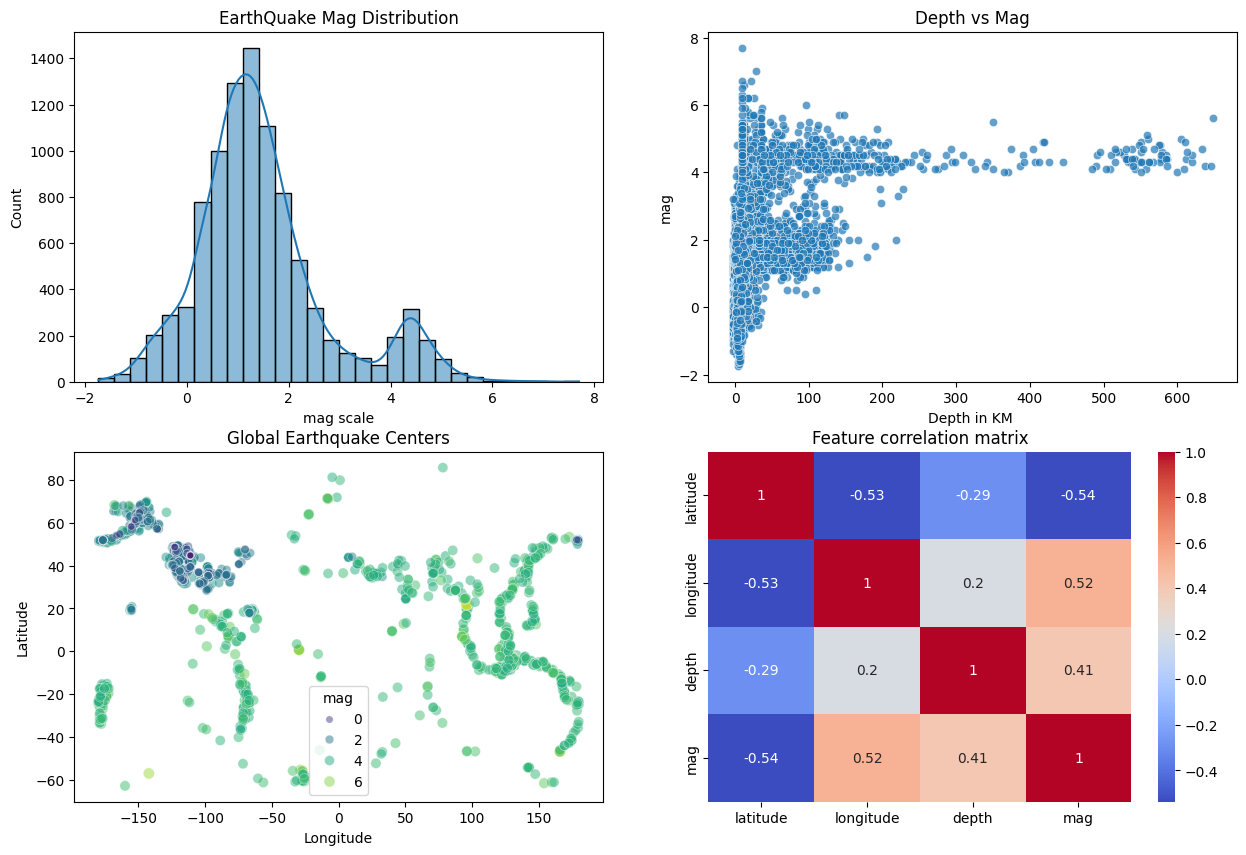

In [8]:
# basic visuals
# using subplot to create multiple graphs 
# set figure size
plt.figure(figsize=(15,10))
# first plot 
plt.subplot(2,2,1)
plt.title("EarthQuake Mag Distribution")
plt.xlabel('mag scale')
sb.histplot(df[target],kde=True,bins=30)


# plot 2  Depth vs MAG 
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.xlabel('Depth in KM ')
sb.scatterplot(x='depth',y=target, data=df, alpha=0.7)

# plot 3 Gloab Earthquake location 
plt.subplot(2,2,3)
plt.title("Global Earthquake Centers")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sb.scatterplot(x='longitude',y='latitude', size=target,data=df,alpha=0.5,hue=target,palette='viridis')

# plot features Correlation 
plt.subplot(2,2,4)
sb.heatmap(df[features + [target]].corr(),annot=True,cmap='coolwarm')
plt.title("Feature correlation matrix")
plt.show()

In [11]:
# data preprocessing for spliting into training and testing phase 
features_data  = df[features]
label_data = df[target]

ft_train,tf_test,lb_train,lb_test=train_test_split(features_data,label_data,test_size=0.15,random_state=50)

In [13]:
# calling Regression method out of given / supported also 
regr_model = RandomForestRegressor(n_estimators=100,random_state=50)

In [14]:
# apply training data to train the model
trained_model = regr_model.fit(ft_train,lb_train)

In [15]:
# Prediction of magnitude
print("actual MAg values : ",lb_test)

actual MAg values :  8682    2.00
3275    1.01
8894    1.90
6725   -0.31
7810    0.92
        ... 
8360    1.02
486     0.49
8607    0.14
8889   -0.37
5908    0.08
Name: mag, Length: 1439, dtype: float64


In [16]:
# prediction 
predicted_mag = trained_model.predict(tf_test)
print(predicted_mag)

[ 1.0842  0.9665  1.5445 ... -0.6525 -0.2087  0.2222]


In [18]:
# evaluation the model accuracy 
rmse = mean_squared_error(lb_test,predicted_mag,squared=False)
print("root mean square Error ",rmse)

root mean square Error  0.4671127745064057


In [19]:
# only 4 decimal points
print(f"Model RMSE : { rmse:.4f}")

Model RMSE : 0.4671
